# Introduction to the openPMD-viewer API

This notebook explains how to use the openPMD API, in order access and plot the data stored in a set of openPMD files.

The openPMD-viewer API does not require the ipython notebook, and can be run in a normal Python environnement.
It can typically be used to write Python scripts, which perform pre-determined data analysis operations.

## (optional) Preparing this notebook to run it locally

If you choose to run this notebook locally, you will need to download the openPMD data files which will then be visualized. To do so, execute the following cell.

In [ ]:
!wget https://github.com/RemiLehe/openPMD-example-datasets/raw/master/example-2d.tar.gz
!tar zxf example-2d.tar.gz

In addition, we choose here to incorporate the plots inside the notebook.

In [1]:
%matplotlib inline

## Preparing the API

In order to start using the API:

- Load the class `OpenPMDTimeSeries` from the module `opmd_viewer`

In [2]:
from opmd_viewer import OpenPMDTimeSeries

- Create a time series object by pointing, to the folder which contains the corresponding openPMD data

In [3]:
ts = OpenPMDTimeSeries('./example-2d/hdf5/')

## Using the API for the fields

### Accessing the field data

The fields can be read with the method `get_field`, by giving either the time (in seconds) or the iteration (an integer). When giving a time, it is no needed to provide the exact time of an available iteration, as the time of the closest available value will be used instead.

In [4]:
# One example
rho, extent_rho = ts.get_field( iteration=100, field='rho' )
# Another example
Ex, extent_Ex = ts.get_field( t=100.e-15,  field='E', coord='x' )

The method `get_field` returns two quantities:
- An 2D array containing the values of the requested field.
- An extent (an array containing only four values, corresponding to minimum and maximum of the coordinates along each axis) 

These arrays can then be used in a Python environnement to perform numerical analysis.

### Plotting the field data 

A user could directly plot the extracted array `Ex` by using e.g. matplotlib's `imshow`.

However, for convenience, openPMD-viewer can also directly plot the data, if the argument `plot = True` is used.

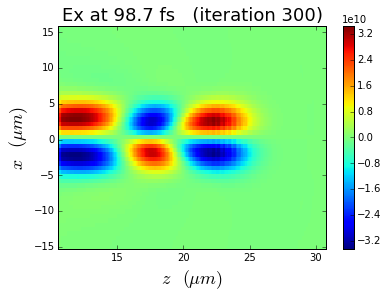

In [5]:
Ex, extent_Ex = ts.get_field( t=100.e-15,  field='E', coord='x', plot=True )

### Missing or inconsistent argument

If an argument is missing or inconsistent, a helper message will be printed.

In [6]:
E, extent_E = ts.get_field( field='E' )

The field E is a vector field, but the `coord` argument is missing or erroneous.
The available coordinates are: 
 - x
 - y
 - z
Please set the `coord` argument accordingly.


In [7]:
Ex, extent_Ex = ts.get_field( field='bogus_field', coord='x' )

The `field` argument is missing or erroneous.
The available fields are: 
 - J
 - B
 - E
 - rho
Please set the `field` argument accordingly.


### Additional documentation

Additonal documentation on `get_field` can be obtained by reading its docstring. This can be done for instance by executing the following command in an IPython environnement.

In [8]:
ts.get_field?

## API for the particles

### Accessing the particle data

The particle quantities can be read by using the method `get_particle`. Again, the user can give either a physical time, or an iteration. Additionally, the user can request either one particle quantities (by setting the argument `q1`) or two particle quantities (by setting the arguments `q1` and `q2`).

In [9]:
# One example
z = ts.get_particle( q1='z', t=150.e-15, species='electrons')
# Another example
x, uz = ts.get_particle( q1='x', q2='uz', iteration=100, species='ions') 

The returned objects are 1D arrays with one element per macroparticle.

### Plotting the particle data

The openPMD-viewer provides plotting support when the argument `plot = True` is set:

- When only one quantity is requested, a histogram of this quantity is plotted. (This histogram takes into account the weight of the macroparticles.)

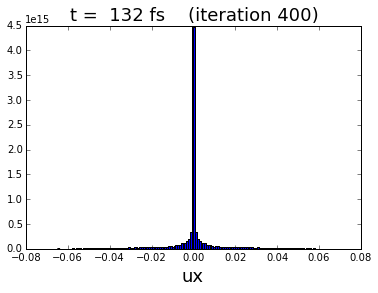

In [10]:
ux = ts.get_particle( q1='ux', iteration=400, species='electrons', plot=True )

- When two quantities are requested, a 2d histogram is plotted. (It also takes into account the weight of the macroparticles.)

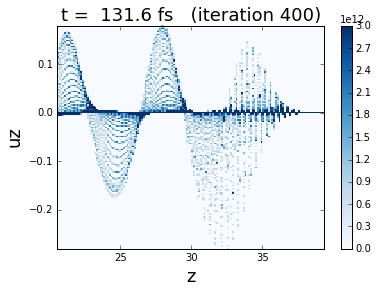

In [11]:
z, uz = ts.get_particle( q1='z', q2='uz', iteration=400, species='electrons', plot=True, vmax=3e12 )

### Missing or inconsistent arguments

As for the fieds, if an argument is missing or inconsistent, a helper message will be printed.

In [12]:
z = ts.get_particle( q1='z', t=150.e-15 )

The argument `species` is missing or erroneous.
The available species are: 
 - electrons
 - ions
Please set the argument `species` accordingly.


In [13]:
z = ts.get_particle( q1='bogus_quantity', t=150.e-15, species='electrons' )

The argument `q1` is missing or erroneous.
The available quantities are: 
 - x
 - y
 - z
 - ux
 - uy
 - uz
 - w
Please set the argument `q1` accordingly.


### Additional documentation

As for the `get_field` method, the documentation on `get_particle` can be obtained by reading its docstring. This can be done for instance by executing the following command in an IPython environnement.

In [14]:
ts.get_particle?